# Import Dependecies

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
maindf = pd.read_csv('/content/drive/MyDrive/HospitalCost.csv')

maindf.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(1338, 7)

In [ ]:
maindf

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Which categories are included in our data set?
maindf.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
maindf.describe() #The function “describe” will present characteristics of all numerical categories


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Analysis

## Age Group

In [ ]:
maindf["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

<Axes: title={'center': 'Number of people by Age'}, xlabel='age', ylabel='count'>

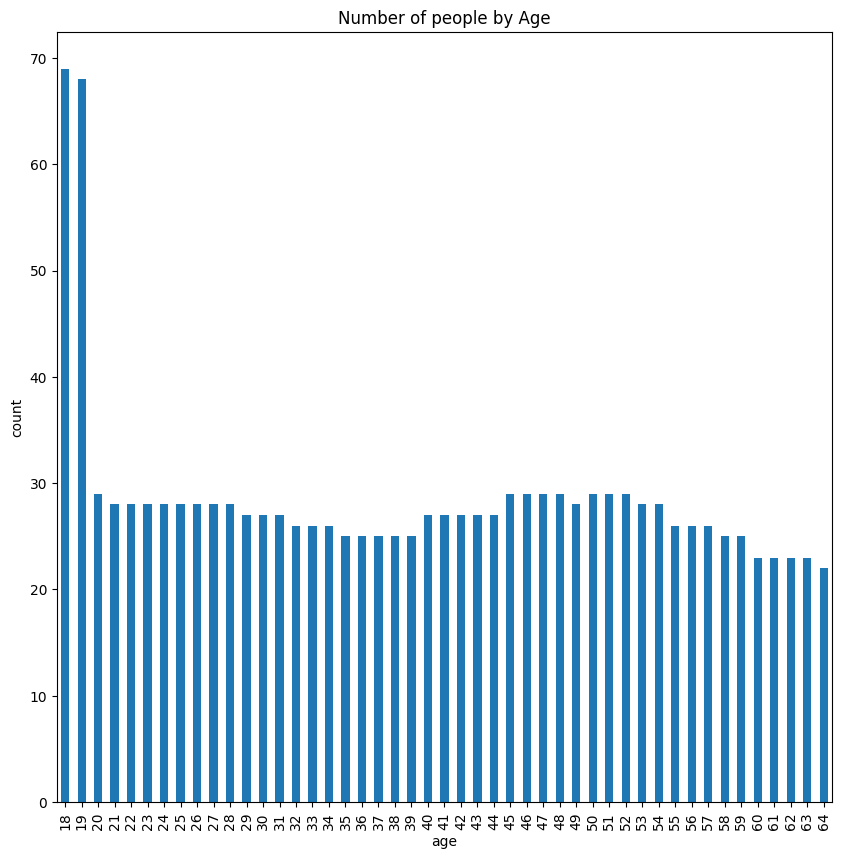

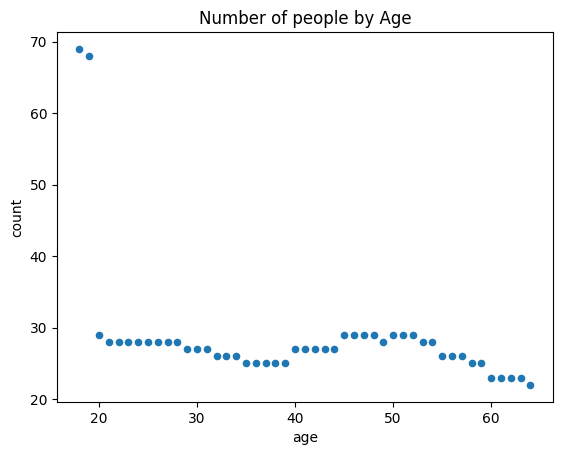

In [ ]:
maindf.reset_index().groupby('age')['index'].count().plot(kind='bar',figsize=(10,10,),ylabel='count', title='Number of people by Age')
pd.DataFrame(maindf.reset_index().groupby('age')['index'].count().reset_index()).plot(kind='scatter',x='age',y='index', ylabel='count', title='Number of people by Age')

## Scatter Plot showing Age/Charges

<Axes: title={'center': 'Charges by Region'}, xlabel='region', ylabel='charges'>

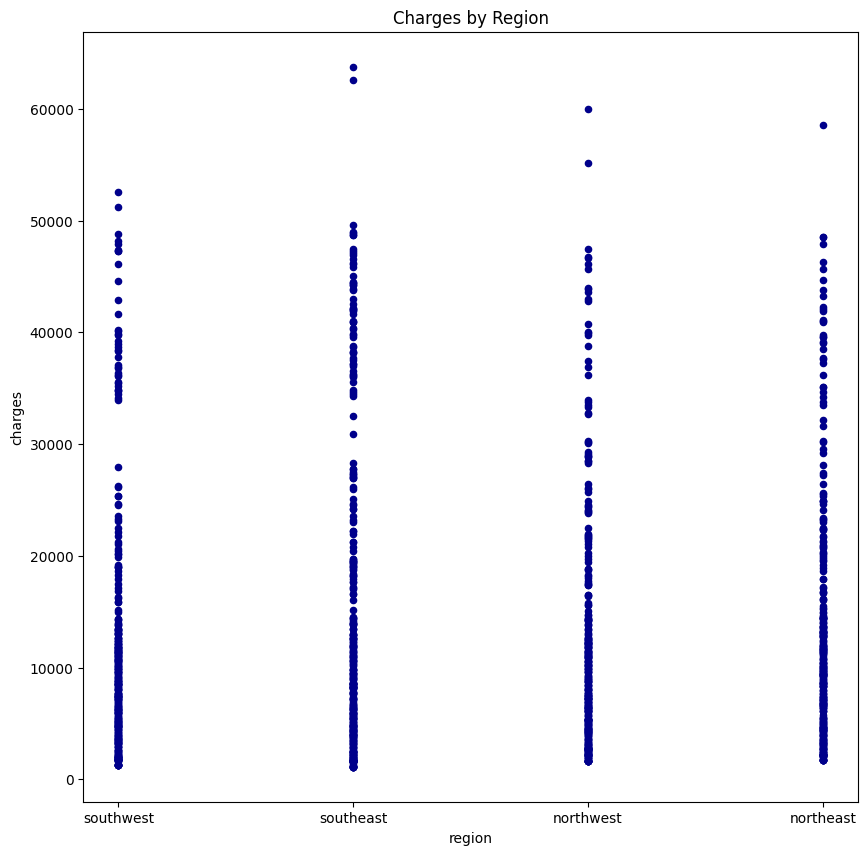

In [ ]:
maindf[['region','charges']].plot(kind='scatter',x='region',y='charges',c='DarkBlue',figsize=(10,10), title="Charges by Region")

<Axes: >

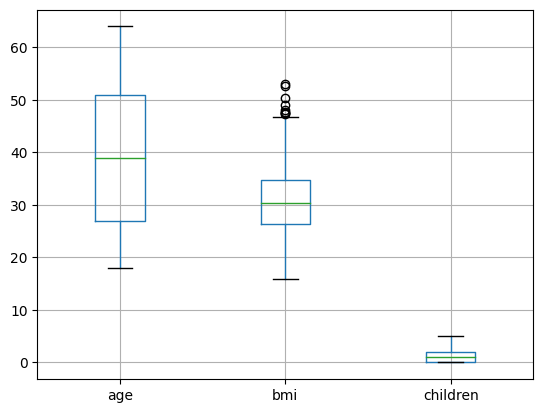

In [ ]:
#boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])
maindf.boxplot(column=['age', 'bmi', 'children']) #Box Plot: A Graphical Way to Show minimum, maximum, median, and two quartiles

## Data Analysis on Gender

In [ ]:
maindf['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

<Axes: title={'center': 'Number of Males and Females'}, ylabel='count'>

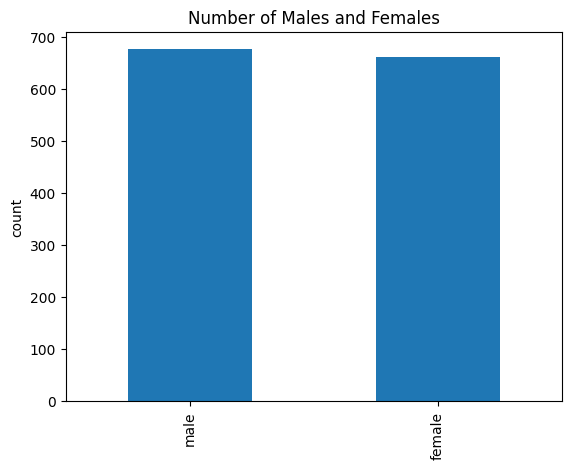

In [ ]:
#maindf['sex']
maindf['sex'].value_counts().plot(kind='bar', ylabel='count', title='Number of Males and Females')

## Analysis between Sex & Charges

array([<Axes: xlabel='sex'>, <Axes: xlabel='sex'>], dtype=object)

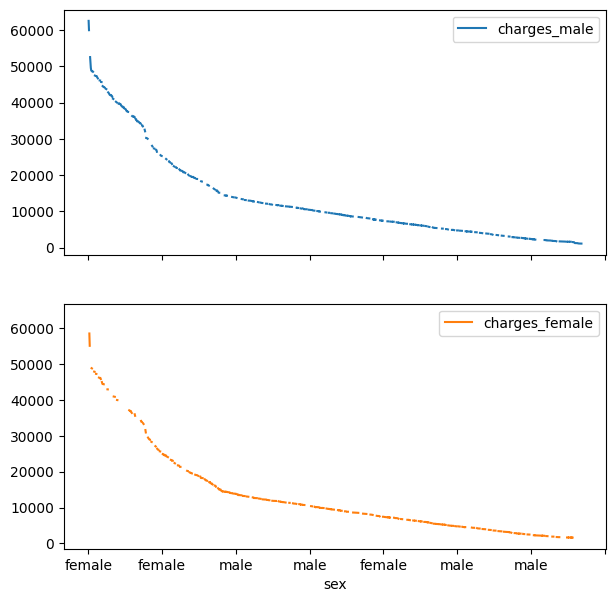

In [ ]:
temp = maindf[['sex', 'charges']].copy()  # Create a copy to avoid SettingWithCopyWarning

temp.loc[temp['sex'] == 'male', 'charges_male'] = temp.loc[temp['sex'] == 'male', 'charges']
temp.loc[temp['sex'] != 'male', 'charges_female'] = temp.loc[temp['sex'] != 'male', 'charges']

temp = temp.sort_values('charges', ascending=False)

# Plotting the charges for male and female separately
temp[['sex', 'charges_male', 'charges_female']].set_index('sex').plot(figsize=(7, 7), subplots=True)


In [ ]:
temp['charges_male'].describe()

count      676.000000
mean     13956.751178
std      12971.025915
min       1121.873900
25%       4619.134000
50%       9369.615750
75%      18989.590250
max      62592.873090
Name: charges_male, dtype: float64

In [ ]:
temp['charges_female'].describe()

count      662.000000
mean     12569.578844
std      11128.703801
min       1607.510100
25%       4885.158700
50%       9412.962500
75%      14454.691825
max      63770.428010
Name: charges_female, dtype: float64

<Axes: title={'center': 'M/F Charges'}, xlabel='sex', ylabel='charges'>

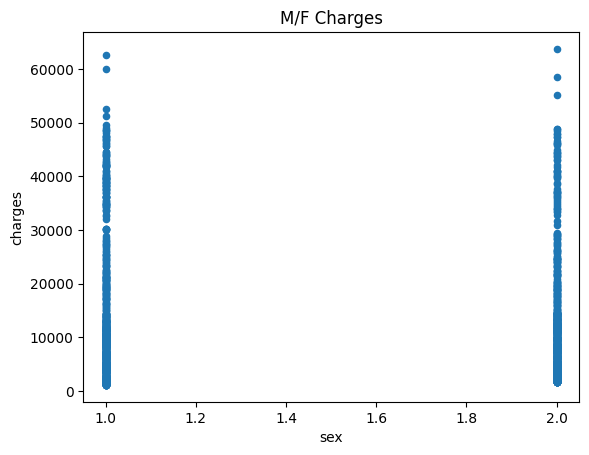

In [ ]:
temp=maindf.copy()
temp.loc[temp['sex']=='male','sex']=str(1)
temp.loc[temp['sex']!='1','sex']=str(2)

temp['sex']= temp['sex'].astype(int)
#temp['sex'].unique()
temp[['sex','charges']].plot(kind='scatter',x='sex',y='charges', title='M/F Charges')

## BMI Analysis

In [ ]:
maindf['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

<Axes: title={'center': 'Charges per BMI'}, xlabel='bmi', ylabel='charges'>

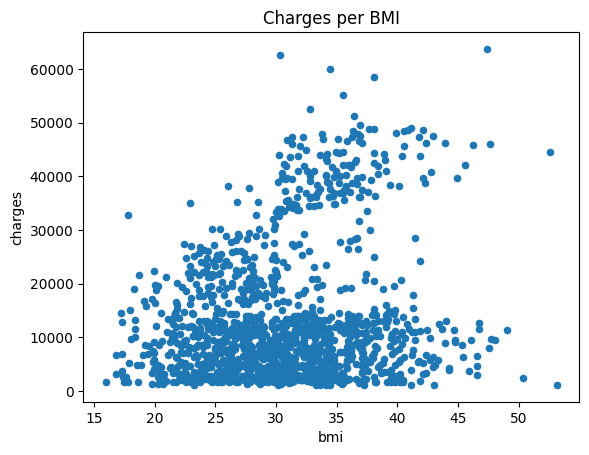

In [ ]:
maindf[['bmi','charges']].plot(kind='scatter',x='bmi',y='charges', title='Charges per BMI')

## Analysis with Children

In [ ]:
maindf.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
maindf['children'].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

<Axes: title={'center': 'People with Children'}, xlabel='Children', ylabel='People'>

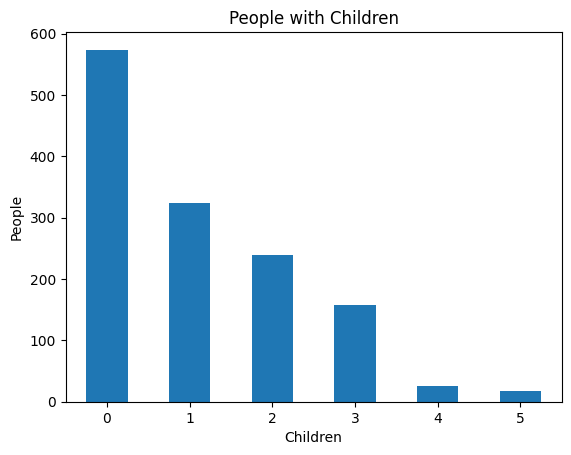

In [ ]:
maindf['children'].value_counts().plot(kind='bar',rot=0, xlabel="Children", ylabel="People", title='People with Children')

<Axes: title={'center': 'Charges by number of Children'}, xlabel='children', ylabel='charges'>

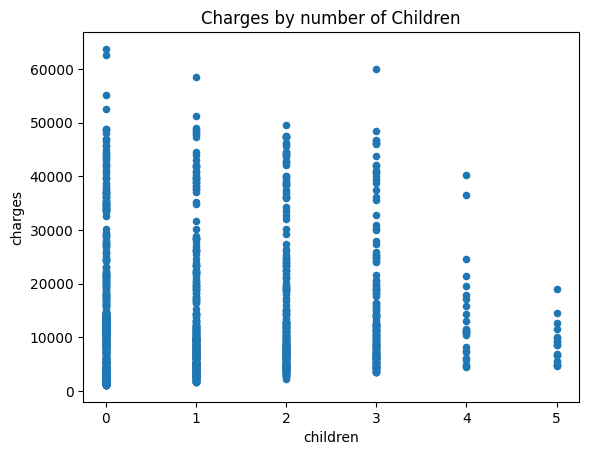

In [ ]:
maindf[['children','charges']].plot(kind='scatter',x='children',y='charges', title='Charges by number of Children')

## Analysis on Smokers

In [ ]:
maindf['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [ ]:
maindf.loc[maindf['smoker'] == 'no', 'smoker'] = '0'
maindf.loc[maindf['smoker'] != '0', 'smoker'] = '1'
maindf['smoker'] = maindf['smoker'].astype(int)


<Axes: title={'center': 'Charges for Smokers v. Non-Smokers'}, xlabel='smoker', ylabel='charges'>

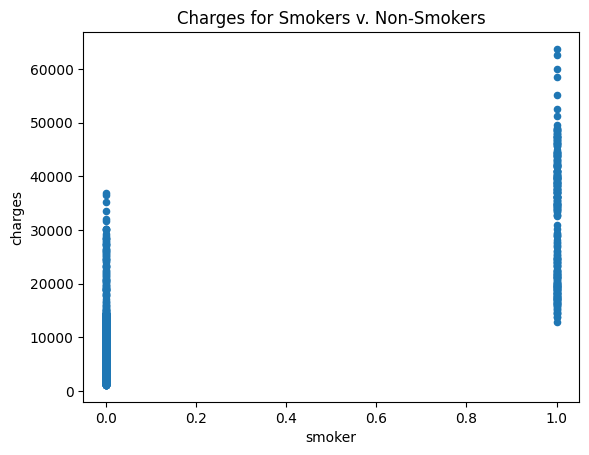

In [ ]:
maindf[['smoker','charges']].plot(kind='scatter',x='smoker',y='charges', title="Charges for Smokers v. Non-Smokers")

## Regional Analysis

<Axes: title={'center': 'Number of People per Region'}, ylabel='Count'>

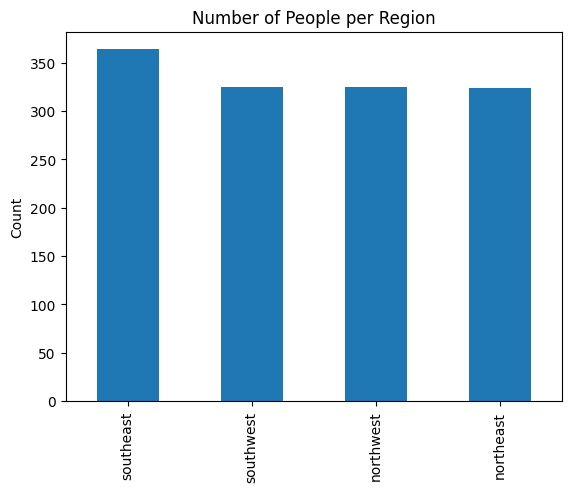

In [ ]:
maindf['region'].value_counts().plot(kind='bar', ylabel="Count", title="Number of People per Region")

southwest  =  0
southeast  =  1
northwest  =  2
northeast  =  3


<Axes: title={'center': 'Charges Per Region'}, xlabel='region', ylabel='charges'>

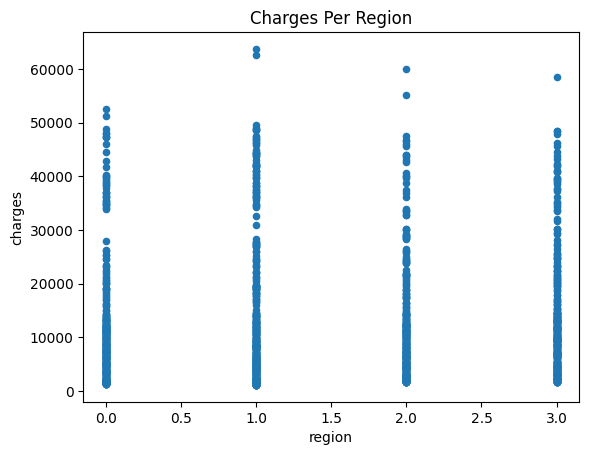

In [ ]:
temp = maindf[['region','charges']].copy()
temp['temp'] = np.nan
q=-1
for region in maindf['region'].unique():
    q+=1
    temp.loc[temp['region']==region,'temp'] = str(q)
    print(region,' = ',q)

temp['region'] = np.nan
temp['region']= temp['temp']
temp['region'] = temp['region'].astype(int)
del temp['temp']
temp[['region','charges']].plot(kind='scatter',x='region',y='charges', title="Charges Per Region")

## Correlating each variables with charges

In [ ]:
maindf = pd.read_csv('/content/drive/MyDrive/HospitalCost.csv')

In [ ]:
temp = maindf.copy()

temp.loc[temp['sex'] == 'male', 'sex'] = '1'
temp.loc[temp['sex'] != '1', 'sex'] = '2'
temp['sex'] = temp['sex'].astype(int)

temp.loc[temp['smoker'] == 'no', 'smoker'] = '0'
temp.loc[temp['smoker'] != '0', 'smoker'] = '1'
temp['smoker'] = temp['smoker'].astype(int)

temp['temp'] = np.nan
q = -1

for region in maindf['region'].unique():
    q += 1
    temp.loc[temp['region'] == region, 'temp'] = str(q)

temp['region'] = temp['temp'].astype(int)
del temp['temp']

maindf = temp.copy()

In [ ]:
maindf.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
maindf.corr()['charges'].sort_values(ascending=False)[1:]

smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
region      0.006208
sex        -0.057292
Name: charges, dtype: float64

## Findings

###### Finding correlations between different categories, e.g. bmi vs charges, smokers vs charges, children vs charges:
##### It seems smokerS is highest when correlated with charges and the same pattern can be seen in visuals of smoker vs charges.

##### What categories contributed more to the health cost, if so & why? categories columns : smoker,children,region. Yes, smoker is contrbuting most to the health cost , and rightly so is because smokers are more vulnerable to lung cancer, and other types of cancer , so they do spend more on insurance.

##### What are the effects of medical/health cost between male & female, cigarettes usage, BMI effects? Effects of health cost on sex: Gender does not contribute at all to charges, means gender has no effect on charges . Either you are male and female, charges are unrelated to this.

##### Effects of cigrattes (smokers) on health cost: As obvious, smokers are more vulnerable to health issues so they do have more charges than non-smokers effect of BMI on health cost: As shown in above visuals 'bmi vs charges' , there is a mix of response on charges, low bmi's also have high charges and high bmi's do also have high charges, and correlation also close to 0, so we can say that BMI has no effect on health cost.

# Using Machine Learning to Predict Healthcare Costs

Compare various regression models to find the most accurate model to determine the effect of several factors on insurance costs & predict the cost of health insurance based on factors that influence it.

## Preparing Our Data

In [ ]:
maindf = pd.read_csv('/content/drive/MyDrive/HospitalCost.csv')
maindf.shape

(1338, 7)

From the data analysis part we can see 3 factors are most influencing for the charge colum:
a) smoker
b) age
c) bmi
All 3 columns are responsible for the increase or decrease in price

### Convert categorical columns into numerical values for ML algorithm input

In [ ]:
maindf.loc[maindf['smoker'] == 'no', 'smoker'] = '0'
maindf.loc[maindf['smoker'] != '0', 'smoker'] = '1'
maindf['smoker'] = maindf['smoker'].astype(int)

maindf.loc[maindf['sex'] == 'male', 'sex'] = '0'
maindf.loc[maindf['sex'] != '0', 'sex'] = '1'
maindf['sex'] = maindf['sex'].astype(int)

maindf.loc[maindf['region'] == 'southwest', 'region'] = 0
maindf.loc[maindf['region'] == 'southeast', 'region'] = 1/3
maindf.loc[maindf['region'] == 'northwest', 'region'] = 2/3
maindf.loc[maindf['region'] == 'northeast', 'region'] = 1
maindf['region'] = maindf['region'].astype(float)

In [ ]:
maindf.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region      float64
charges     float64
dtype: object

### Now we do have columns in integer and floating points

In [ ]:
y = maindf['charges']
x = maindf[['smoker','age','bmi', 'children', 'sex', 'region']].iloc[:,:]
x

,smoker,age,bmi,children,sex,region
0,1,19,27.900,0,1,0.000000
1,0,18,33.770,1,0,0.333333
2,0,28,33.000,3,0,0.333333
3,0,33,22.705,0,0,0.666667
4,0,32,28.880,0,0,0.666667
...,...,...,...,...,...,...
1333,0,50,30.970,3,0,0.666667
1334,0,18,31.920,0,1,1.000000
1335,0,18,36.850,0,1,0.333333
1336,0,21,25.800,0,1,0.000000


### Normalizing inut columns age and bmi

In [ ]:
x = x.copy()  # Create a copy to avoid modifying the original DataFrame

x.loc[:, 'age'] = x['age'] / x['age'].max()
x.loc[:, 'bmi'] = x['bmi'] / x['bmi'].max()
x.loc[:, 'children'] = x['children'] / x['children'].max()
x

,smoker,age,bmi,children,sex,region
0,1,0.296875,0.525127,0.0,1,0.000000
1,0,0.281250,0.635611,0.2,0,0.333333
2,0,0.437500,0.621118,0.6,0,0.333333
3,0,0.515625,0.427348,0.0,0,0.666667
4,0,0.500000,0.543572,0.0,0,0.666667
...,...,...,...,...,...,...
1333,0,0.781250,0.582910,0.6,0,0.666667
1334,0,0.281250,0.600791,0.0,1,1.000000
1335,0,0.281250,0.693582,0.0,1,0.333333
1336,0,0.328125,0.485601,0.0,1,0.000000


### Train test split to judge how well our model is performing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

## Linear Regression
Import and fit the model

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_,x.columns,
columns=['Coefficient'])

print(coeff_df)
x

-13122.915719913757
           Coefficient
smoker    23693.327755
age       16768.332106
bmi       18184.584494
children   1866.040190
sex        -129.102704
region      883.489220


,smoker,age,bmi,children,sex,region
0,1,0.296875,0.525127,0.0,1,0.000000
1,0,0.281250,0.635611,0.2,0,0.333333
2,0,0.437500,0.621118,0.6,0,0.333333
3,0,0.515625,0.427348,0.0,0,0.666667
4,0,0.500000,0.543572,0.0,0,0.666667
...,...,...,...,...,...,...
1333,0,0.781250,0.582910,0.6,0,0.666667
1334,0,0.281250,0.600791,0.0,1,1.000000
1335,0,0.281250,0.693582,0.0,1,0.333333
1336,0,0.328125,0.485601,0.0,1,0.000000


In [ ]:
y_pred = lm.predict(X_test)

print("Predicted medical costs values:", y_pred)

Predicted medical costs values: [ 8.78466310e+03  7.04398195e+03  3.70004516e+04  9.44957416e+03
  2.70626293e+04  1.08416736e+04  2.11885469e+01  1.72079962e+04
  8.85392601e+02  1.12435626e+04  2.79014785e+04  9.42461821e+03
  5.14148294e+03  3.85317299e+04  4.05907383e+04  3.72534005e+04
  1.52350547e+04  3.59604557e+04  9.06848175e+03  3.14983426e+04
  3.47340796e+03  1.00475901e+04  2.26006465e+03  7.01947703e+03
  1.11813736e+04  1.29649989e+04  1.44818242e+04  5.93562038e+03
  9.79640231e+03  2.20356674e+03  8.74941063e+03  1.31638808e+04
  4.47939707e+03  3.14495784e+03  4.33040267e+03  1.31746991e+04
  1.65911697e+03  8.62116160e+03  3.32866549e+04  3.27180611e+04
  3.38092361e+03  4.33343362e+03  1.40465976e+04  1.16384717e+04
  8.80017206e+03  1.21209093e+04  5.09589990e+03  2.73479552e+03
  3.55620582e+04  9.17974352e+03  1.59730552e+04  2.31323008e+03
  1.23670414e+04  1.41836218e+03  1.36280844e+04  1.25974054e+04
  4.33481766e+03  3.21717123e+04  1.32732821e+04  1.289808

Create a scatterplot comparing predicted chargest to true charges

<Axes: xlabel='charges'>

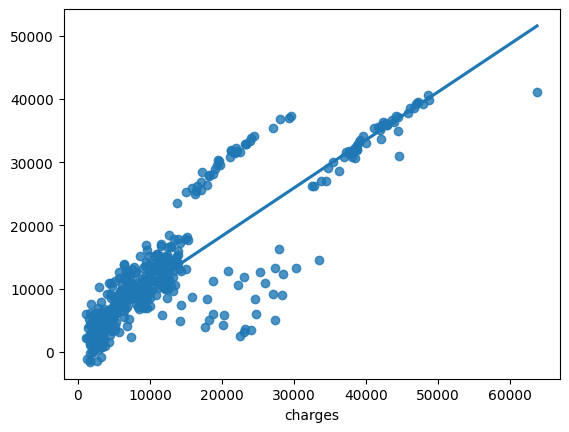

In [ ]:
sns.regplot(x=y_test, y=y_pred, ci=None)

### Calculate RMSE and r2
Store them in a dictionary under the model type

In [ ]:
from sklearn import metrics

dict = {
    #"Model": ['RMSE', 'R2'],
    "Linear": [metrics.mean_squared_error(y_test, y_pred, squared = False), metrics.r2_score(y_test, y_pred)]
         }


print("RMSE",metrics.mean_squared_error(y_test, y_pred, squared = False))
print("R2", metrics.r2_score(y_test, y_pred))

RMSE 5927.226827909313
R2 0.7602640802497018


## Bayesian Linear


<Axes: xlabel='charges'>

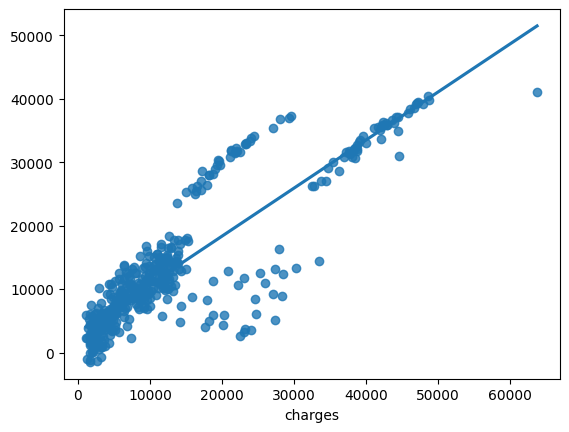

In [ ]:
from sklearn.linear_model import BayesianRidge
bayes = BayesianRidge()
bayes.fit(X_train, y_train)

y_pred = bayes.predict(X_test)

sns.regplot(x=y_test, y=y_pred, ci=None)

Now, Let's Measure the accuracy of that model using RMSE

In [ ]:
dict["Bayseian"] = [metrics.mean_squared_error(y_test, y_pred, squared=False), metrics.r2_score(y_test, y_pred)]

print("RMSE",metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R2", metrics.r2_score(y_test, y_pred))

RMSE 5926.12937568977
R2 0.7603528483592842


## Decision Tree Regressor
This is different from the previous models, in that it is a non-linear model

<Axes: xlabel='charges'>

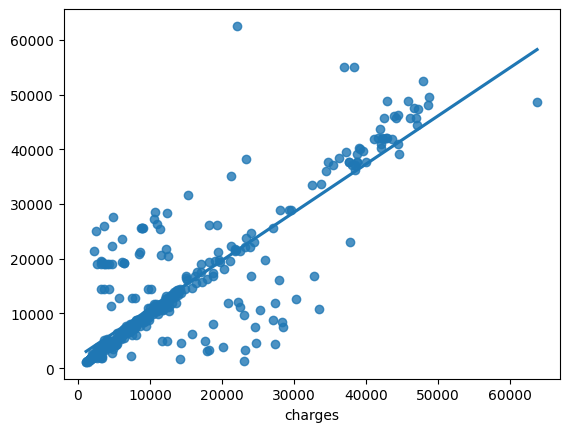

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

sns.regplot(x=y_test, y=y_pred, ci=None)

In [ ]:
dict["Decision Tree"] = [metrics.mean_squared_error(y_test, y_pred,squared=False), metrics.r2_score(y_test, y_pred)]

print("RMSE", metrics.mean_squared_error(y_test, y_pred,squared=False))
print("R2", metrics.r2_score(y_test, y_pred))

RMSE 6636.884354592588
R2 0.6994210832036751


## Random Forest Regressor
This is a type of Decision Tree model, which uses bagging to create multiple smaller trees and averages their predictions.

<Axes: xlabel='charges'>

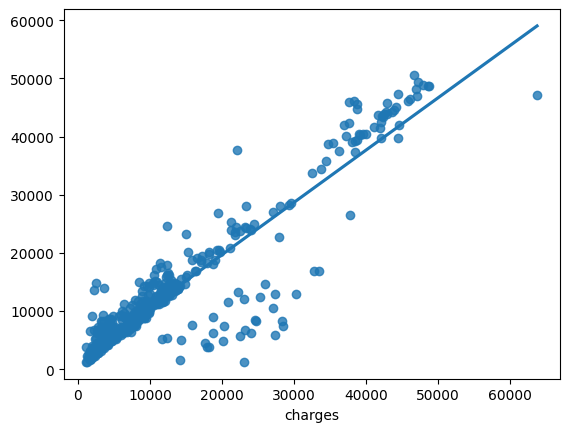

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

sns.regplot(x=y_test, y=y_pred, ci=None)

In [ ]:
dict["Random Forest"] = [metrics.mean_squared_error(y_test, y_pred,squared=False), metrics.r2_score(y_test, y_pred)]

print("RMSE",metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R2", metrics.r2_score(y_test, y_pred))

RMSE 4753.74696539537
R2 0.8457936929162497


## Gradient Boosting Regressor
While this is another Decision Tree Regression model,
unlike Random Forest, it works by building decision trees one by one, and combining the results throughout the process rather than at the end.


<Axes: xlabel='charges'>

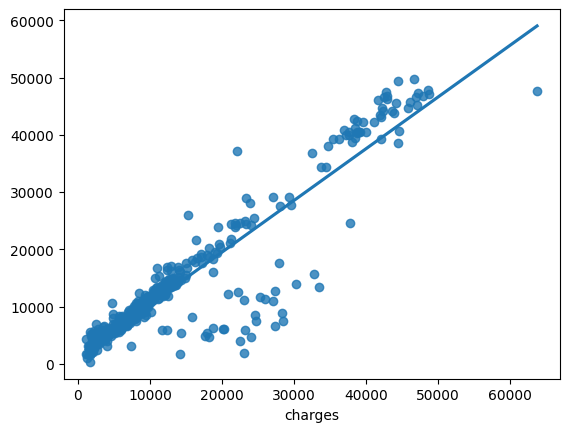

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)


y_pred = gb.predict(X_test)

sns.regplot(x=y_test, y=y_pred, ci=None)

In [ ]:
dict["Gradient Boosting"] = [metrics.mean_squared_error(y_test, y_pred,squared=False), metrics.r2_score(y_test, y_pred)]

print("RMSE", metrics.mean_squared_error(y_test, y_pred,squared=False))
print("R2", metrics.r2_score(y_test, y_pred))

RMSE 4547.853749687474
R2 0.8588623133346764


# Analyzing Our Results
By grabbing the RMSE and R2 values for each model's predictions, we can place them into a dataframe table for direct comparison.

In [ ]:
data = pd.DataFrame.from_dict(dict, orient='index',columns=['RMSE', 'R2'])
data.head()

,RMSE,R2
Linear,5927.226828,0.760264
Bayseian,5926.129376,0.760353
Decision Tree,6636.884355,0.699421
Random Forest,4753.746965,0.845794
Gradient Boosting,4547.853750,0.858862


<Axes: title={'center': 'RMSE for Each Model'}, ylabel='RMSE'>

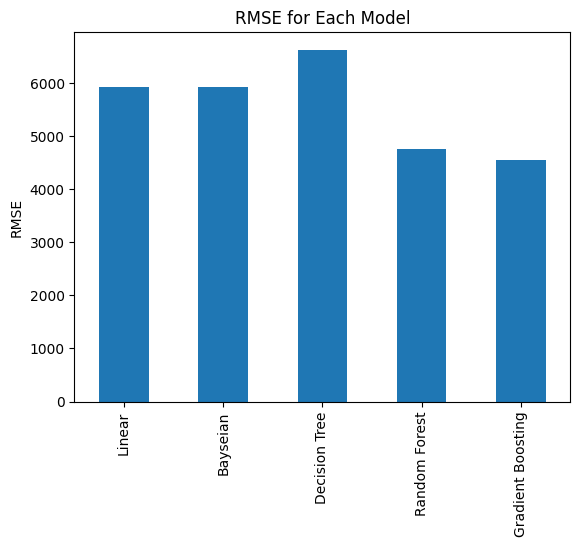

In [ ]:
data.loc[:, 'RMSE'].plot(kind='bar', ylabel='RMSE', title = 'RMSE for Each Model')

<Axes: title={'center': 'R2 for Each Model'}, ylabel='R2'>

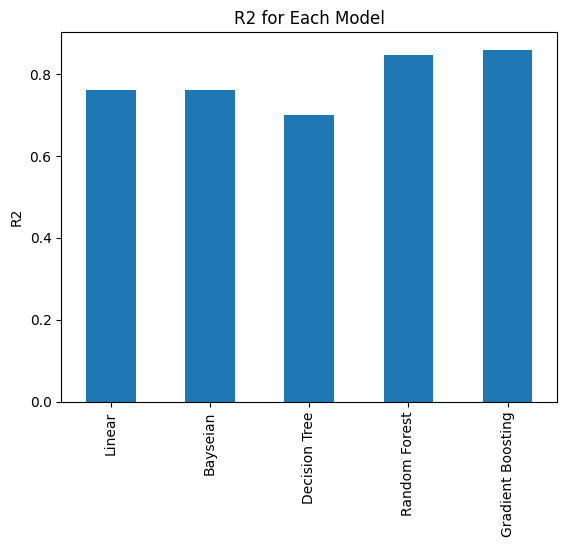

In [ ]:
data.loc[:, 'R2'].plot(kind='bar', ylabel='R2', title = 'R2 for Each Model')

After looking at the scatterplots, it should come as no surprise that Gradient Boosting Regression produced the most accurate predictions, with an RMSE score of 4574 and an R2 value of 0.859. What does surprise, however, is that the least accurate model ended up being the basic Decision Tree. This is surprising because the two best performing models, Random Forest and Gradient Boosting, are both variations of Decision Tree Regression models. As we could see in the graph, the Decision Tree model also lacked the odd behavior seen in the linear and bayesian models in which there was a large divide in the center of the data, which did not fit to the regression line. This behavior was not observed in any of the other non-linear models, and is likely due to the fact that the data for the costs were not ideally linear.
<br><br>
The Decision Tree model did, however, have a larger variation, as noted in the R2 and RMSE scores (and also visualized by the large spread in the scatterplot). This variation is key to understanding the significant improvements in accuracy for the Random Forest and Gradient Boosting models, which utilize bagging to reduce variance. As for why Gradient Boosting performs better than Random Forest, this behavior might be explained by the way in which the results of each tree are compounded. Gradient Boosting builds and compounds the results each tree one by one, improving the model's predictions with each iteration, as opposed to Random Forest, which simply averages the collection of results at the end. With this, we have a better understanding as to why Gradient Boosting was able to outperform the linear models as well as the other (non-linear) Decision Tree models.

Now that we have found the most accurate model for predicting costs, we can look to the GB Regressor model's feature importances for the most accurate reading of the overall influence each factor plays into predicting Healthcare cost.

In [ ]:
pd.DataFrame(data=[gb.feature_importances_,], columns=x.columns, index=['Influence']).head()

,smoker,age,bmi,children,sex,region
Influence,0.670598,0.12388,0.191089,0.010327,0.000337,0.003768


Looking at the trained model, we can see that a person being a smoker is the most influencing factor (~67%) in a person's hospital expenditures, which aligns with our previous findings of the overall data.